In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [3]:
df_raw = pd.read_csv("decathlon.csv", sep=",")
print("Dataframe Raw: ", len(df_raw))

Dataframe Raw:  141


In [4]:
df_main = df_raw.copy()
print("Dataframe Main: ", len(df_main))

Dataframe Main:  141


In [5]:
corr = df_main.iloc[:,0:11].corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
100m,1.000000,0.059503,0.015603,0.148809,0.106977,-0.142131,0.070838,0.094202,-0.145114,0.034294
Long.jump,0.059503,1.000000,-0.101312,-0.076934,0.058863,-0.005516,-0.024921,0.002726,0.050956,0.020812
Shot.put,0.015603,-0.101312,1.000000,0.363336,-0.213604,0.008716,0.080655,-0.031484,0.024767,-0.015403
High.jump,0.148809,-0.076934,0.363336,1.000000,-0.163740,-0.225030,0.070115,-0.217820,-0.068325,-0.071175
400m,0.106977,0.058863,-0.213604,-0.163740,1.000000,0.078516,-0.042573,0.072696,-0.060051,0.052595
110m.hurdle,-0.142131,-0.005516,0.008716,-0.225030,0.078516,1.000000,-0.051920,0.122761,0.007311,0.014739
Discus,0.070838,-0.024921,0.080655,0.070115,-0.042573,-0.051920,1.000000,-0.048238,-0.002004,0.113233
Pole.vault,0.094202,0.002726,-0.031484,-0.217820,0.072696,0.122761,-0.048238,1.000000,-0.012260,0.008994
Javeline,-0.145114,0.050956,0.024767,-0.068325,-0.060051,0.007311,-0.002004,-0.012260,1.000000,-0.007810
1500m,0.034294,0.020812,-0.015403,-0.071175,0.052595,0.014739,0.113233,0.008994,-0.007810,1.000000


<AxesSubplot:>

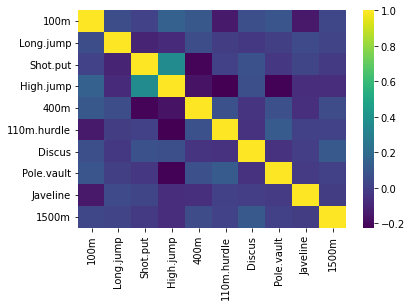

In [6]:
sns.heatmap(corr, cmap="viridis")

In [7]:
X = np.matrix(df_main.iloc[:,1:11])
S = np.cov(np.transpose(X))
np.diagonal(S)

array([5.97401185e-01, 1.49247666e+00, 8.98446971e-01, 5.98666667e-03,
       9.76502785e+00, 9.48610223e-01, 1.77192303e+01, 2.70311864e-01,
       3.70562991e+01, 1.43359485e+02])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca

PCA(n_components=8)

In [9]:
pca.fit(X)

PCA(n_components=8)

In [10]:
pca.components_[0,:]

array([ 2.34136042e-03,  2.10841129e-03, -1.19291197e-03, -4.54433877e-04,
        1.45554412e-02,  1.15662483e-03,  4.52000861e-02,  3.71546395e-04,
       -5.52019706e-03,  9.98850132e-01])

In [11]:
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_,2)

array([0.68, 0.17, 0.08, 0.05, 0.01, 0.  , 0.  , 0.  ])

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.67723911, 0.85222978, 0.93488066, 0.98059156, 0.98766103,
       0.99224842, 0.99619839, 0.99876972])

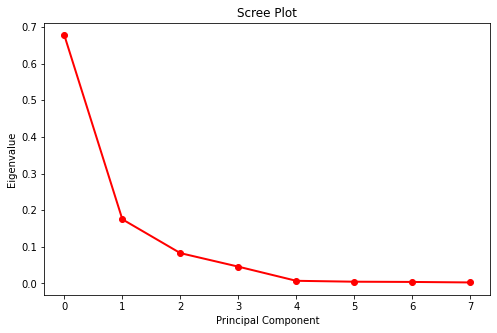

In [13]:
fig = plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [14]:
pca.transform(X)

array([[ 11.61938262,   3.79411795,  -0.91578859, ...,  -0.22321135,
          1.0123609 ,  -0.24652363],
       [ 21.73249842,   0.83742355,   5.63191588, ...,  -0.72533201,
          0.2765445 ,   0.21125467],
       [ 20.39350639,  -8.96199529,   4.0590586 , ...,  -0.64669886,
          0.77605101,   0.1287863 ],
       ...,
       [-17.9845026 ,  -2.66149604,  -2.3666394 , ...,   0.74901935,
         -0.18269682,   0.38657514],
       [-18.28090778,  -9.26165394,   7.90317256, ...,   0.22233515,
         -0.51215202,  -0.87580374],
       [ 13.01969304,   4.16606993,   1.65250811, ...,  -1.22533396,
         -1.46177813,  -1.36076475]])

In [15]:
pca = PCA(n_components=2)
pca.fit(X)

pca.components_

array([[ 2.34136042e-03,  2.10841129e-03, -1.19291197e-03,
        -4.54433877e-04,  1.45554412e-02,  1.15662483e-03,
         4.52000861e-02,  3.71546395e-04, -5.52019706e-03,
         9.98850132e-01],
       [-1.89006448e-02,  1.03703901e-02,  4.59765338e-03,
        -8.36199596e-04, -4.14709678e-02,  1.00485028e-03,
         1.37943594e-04, -1.19477770e-03,  9.98876029e-01,
         6.14522634e-03]])

In [22]:
np.round(pca.components_[0],3)

array([ 0.002,  0.002, -0.001, -0.   ,  0.015,  0.001,  0.045,  0.   ,
       -0.006,  0.999])

In [18]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]
df_main['PCA1'] = PCA1
df_main['PCA2'] = PCA2
df_main.head()

,name,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,11.619383,3.794118
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,21.732498,0.837424
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,20.393506,-8.961995
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,-0.107512,3.333553
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,-3.542242,3.916724


In [19]:
df_main.sort_values(by='PCA2',ascending=False)

,name,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
13,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,OlympicG,0.103408,11.117521
56,Sammy,10.86,9.35,13.68,1.92,49.92,15.09,42.97,4.48,69.99,283.09,3,8859,OlympicG,2.953103,10.546538
90,Swen,10.15,9.16,13.44,1.87,50.16,16.67,41.25,4.65,69.85,299.14,25,7286,Decastar,18.911306,10.506908
44,Ruthy,10.84,6.47,14.78,1.82,49.44,15.42,41.01,5.05,69.90,282.69,30,8637,Decastar,2.451689,10.449120
66,Dot,9.77,5.71,13.89,1.94,47.93,15.09,38.13,5.98,69.79,284.63,28,7647,Decastar,4.234774,10.420096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Manolo,11.34,9.24,12.14,1.90,52.86,14.00,47.66,5.40,50.46,294.45,25,8604,OlympicG,14.664451,-9.032450
130,Hewie,9.06,8.18,14.31,1.85,50.37,13.41,44.06,5.17,50.19,278.52,2,7299,Decastar,-1.455612,-9.255472
139,Consuelo,11.67,8.56,12.97,1.99,53.99,15.18,51.65,5.90,50.49,261.27,7,7775,Decastar,-18.280908,-9.261654
72,Rici,11.55,6.89,14.67,1.81,45.16,14.33,51.54,5.48,50.01,274.00,7,8762,OlympicG,-5.703280,-9.304148
